In [1]:
import pandas as pd
import os
import glob
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
file = '201803_citibikenyc_tripdata.csv'
feb = '201802_citibikenyc_tripdata.csv'
jan = '201801_citibikenyc_tripdata.csv'

In [3]:
path = '/Users/gta/Desktop/bike_data'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
df_sample = df.sample(frac=1, replace=True)

In [5]:
df_sample.shape

(4318677, 16)

In [6]:
df_sample.columns.tolist()

['bikeid',
 'birth year',
 'end station id',
 'end station latitude',
 'end station longitude',
 'end station name',
 'gender',
 'name_localizedValue0',
 'start station id',
 'start station latitude',
 'start station longitude',
 'start station name',
 'starttime',
 'stoptime',
 'tripduration',
 'usertype']

In [7]:
df_sample.reset_index(drop=True)

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,-73.978350,W 55 St & 6 Ave,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber
1,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,-73.976289,Stanton St & Mangin St,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber
2,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,-73.986905,W 54 St & 9 Ave,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber
3,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,-73.994156,W 21 St & 6 Ave,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber
4,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,-74.001659,W Broadway & Spring Street,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer
5,20598,1991.0,3093,40.717452,-73.958509,N 6 St & Bedford Ave,1,Annual Membership from Citi Bike App,539,40.715348,-73.960241,Metropolitan Ave & Bedford Ave,2018-02-01 16:41:49,2018-02-01 16:43:19,90,Subscriber
6,15029,1993.0,296,40.714131,-73.997047,Division St & Bowery,1,Annual Membership,403,40.725029,-73.990697,E 2 St & 2 Ave,2018-01-15 12:53:31,2018-01-15 13:01:17,465,Subscriber
7,17894,1995.0,461,40.735877,-73.982050,E 20 St & 2 Ave,1,NaN,432,40.726218,-73.983799,E 7 St & Avenue A,2017-12-08 08:43:32,2017-12-08 08:50:05,393,Subscriber
8,32520,1994.0,285,40.734546,-73.990741,Broadway & E 14 St,1,Join Citi Bike for $14.95/month,432,40.726218,-73.983799,E 7 St & Avenue A,2018-03-28 18:13:43,2018-03-28 18:20:49,426,Subscriber
9,25713,1992.0,498,40.748549,-73.988084,Broadway & W 32 St,1,NaN,499,40.769155,-73.981918,Broadway & W 60 St,2017-12-06 20:15:13,2017-12-06 20:29:33,860,Subscriber


In [8]:
df_sample['hour'] = ''
df_sample['month'] = ''
df_sample['year'] = ''
df_sample['day_of_week'] = ''

In [9]:
df_sample.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype,hour,month,year,day_of_week
1016237,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,-73.978350,W 55 St & 6 Ave,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber,,,,
476912,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,-73.976289,Stanton St & Mangin St,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber,,,,
1246499,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,-73.986905,W 54 St & 9 Ave,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber,,,,
2734948,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,-73.994156,W 21 St & 6 Ave,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber,,,,
4199291,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,-74.001659,W Broadway & Spring Street,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer,,,,


In [10]:
df_sample['hour'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
df_sample['month'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df_sample['year'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)
df_sample['day_of_week'] = df_sample['starttime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [11]:
df_sample.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype,hour,month,year,day_of_week
1016237,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,-73.978350,W 55 St & 6 Ave,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber,17,1,2018,2
476912,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,-73.976289,Stanton St & Mangin St,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber,12,12,2017,2
1246499,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,-73.986905,W 54 St & 9 Ave,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber,13,1,2018,5
2734948,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,-73.994156,W 21 St & 6 Ave,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber,15,12,2017,0
4199291,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,-74.001659,W Broadway & Spring Street,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer,15,2,2018,0


In [12]:
workday_df = df_sample[['day_of_week', 'tripduration']].groupby(['day_of_week'], as_index=False).count()

In [13]:
month_df = df_sample[['month', 'tripduration']].groupby(['month'], as_index=False).count()
month_df

,month,tripduration
0,1,717429
1,2,845778
2,3,976937
3,12,1778533


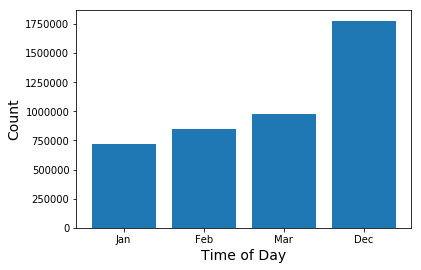

In [14]:
x = np.arange(4)
totals = month_df['tripduration']
fig, ax = plt.subplots()
plt.bar(x, totals)
plt.xlabel('Time of Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(x, ('Jan', 'Feb', 'Mar', 'Dec'))
plt.show()

In [15]:
hour_df = df_sample[['hour', 'tripduration']].groupby(['hour'], as_index=False).count()

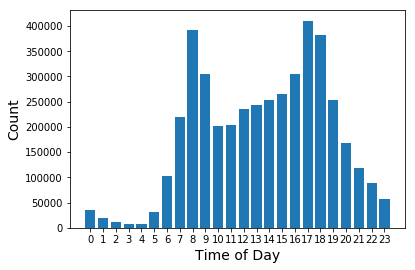

In [16]:
x = np.arange(24)
totals = hour_df['tripduration']
fig, ax = plt.subplots()
plt.bar(x, totals)
plt.xlabel('Time of Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(x, x)
plt.show()

In [17]:
df_sample[['start station id', 
           'tripduration',]].groupby('start station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).head(10)

,start station id,tripduration
256,519,46748
185,435,29777
435,3255,28921
159,402,28676
238,497,28675
232,490,25981
66,285,25663
221,477,24295
259,523,23333
65,284,21789


In [18]:
df_sample[['start station id', 
           'tripduration',]].groupby('start station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).tail(10)

,start station id,tripduration
456,3299,63
292,3036,20
612,3487,19
613,3488,14
610,3485,9
293,3040,8
774,3672,4
432,3245,2
434,3250,1
181,428,1


In [19]:
df_sample[['end station id', 
           'tripduration',]].groupby('end station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).head(10)

,end station id,tripduration
256,519,46906
159,402,31909
238,497,31122
185,435,30340
440,3255,29753
66,285,26590
232,490,26173
221,477,24750
259,523,23342
206,459,22933


In [20]:
df_sample[['end station id', 
           'tripduration',]].groupby('end station id', 
                                                        as_index=False).count().sort_values(by='tripduration', 
                                                                                            ascending=False).tail(10)

,end station id,tripduration
770,3652,3
418,3192,2
439,3250,2
585,3428,2
764,3645,1
446,3270,1
181,428,1
420,3214,1
417,3184,1
419,3198,1


In [21]:
df_sample[['start station id', 'gender',]].groupby('gender', as_index=False).count()

,gender,start station id
0,0,218417
1,1,3164376
2,2,935884


In [22]:
df_sample[['start station id', 'bikeid',]].groupby('bikeid', as_index=False).count().sort_values(by='start station id', 
                                                                                            ascending=False).head(10)

,bikeid,start station id
9489,30164,958
12460,33406,953
12267,33211,927
11175,32090,925
11405,32325,924
10838,31571,912
11147,32061,912
11283,32201,910
12232,33173,910
10606,31329,906


In [23]:
df_sample['age'] = 2018 - df_sample['birth year']

In [24]:
df_sample.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,...,start station name,starttime,stoptime,tripduration,usertype,hour,month,year,day_of_week,age
1016237,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,...,W 55 St & 6 Ave,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber,17,1,2018,2,54.0
476912,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,...,Stanton St & Mangin St,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber,12,12,2017,2,47.0
1246499,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,...,W 54 St & 9 Ave,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber,13,1,2018,5,55.0
2734948,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,...,W 21 St & 6 Ave,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber,15,12,2017,0,62.0
4199291,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,...,W Broadway & Spring Street,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer,15,2,2018,0,NaN


In [25]:
df_sample.head()

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,...,start station name,starttime,stoptime,tripduration,usertype,hour,month,year,day_of_week,age
1016237,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,...,W 55 St & 6 Ave,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber,17,1,2018,2,54.0
476912,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,...,Stanton St & Mangin St,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber,12,12,2017,2,47.0
1246499,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,...,W 54 St & 9 Ave,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber,13,1,2018,5,55.0
2734948,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,...,W 21 St & 6 Ave,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber,15,12,2017,0,62.0
4199291,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,...,W Broadway & Spring Street,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer,15,2,2018,0,NaN


In [26]:
df_sample['tripduration'].describe()

count    4.318677e+06
mean     7.709211e+02
std      8.169284e+03
min      6.100000e+01
25%      3.230000e+02
50%      5.230000e+02
75%      8.730000e+02
max      4.421929e+06
Name: tripduration, dtype: float64

In [27]:
df_sample['bin_duration'] = pd.cut(df_sample['tripduration'], [0, 500, 900, 1000000], labels=['short', 'medium', 'long'])

In [28]:
df_sample.head(20)

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,name_localizedValue0,start station id,start station latitude,...,starttime,stoptime,tripduration,usertype,hour,month,year,day_of_week,age,bin_duration
1016237,21175,1964.0,3459,40.757632,-73.969306,E 53 St & 3 Ave,1,Annual Membership,3458,40.763094,...,2018-01-10 17:45:07,2018-01-10 17:54:44,576,Subscriber,17,1,2018,2,54.0,medium
476912,32284,1971.0,312,40.722055,-73.989111,Allen St & Stanton St,2,NaN,341,40.717821,...,2017-12-13 12:44:28,2017-12-13 12:52:07,458,Subscriber,12,12,2017,2,47.0,short
1246499,30589,1963.0,450,40.762272,-73.987882,W 49 St & 8 Ave,1,Annual Membership,423,40.765849,...,2018-01-20 13:09:55,2018-01-20 13:12:18,143,Subscriber,13,1,2018,5,55.0,short
2734948,18629,1956.0,509,40.745497,-74.001971,9 Ave & W 22 St,2,NaN,435,40.741740,...,2017-12-04 15:28:12,2017-12-04 15:33:10,297,Subscriber,15,12,2017,0,62.0,short
4199291,31354,NaN,3467,40.724947,-74.001659,W Broadway & Spring Street,0,24 Hour,3467,40.724947,...,2018-02-26 15:55:32,2018-02-26 16:02:59,447,Customer,15,2,2018,0,NaN,short
3497589,20598,1991.0,3093,40.717452,-73.958509,N 6 St & Bedford Ave,1,Annual Membership from Citi Bike App,539,40.715348,...,2018-02-01 16:41:49,2018-02-01 16:43:19,90,Subscriber,16,2,2018,3,27.0,short
1117114,15029,1993.0,296,40.714131,-73.997047,Division St & Bowery,1,Annual Membership,403,40.725029,...,2018-01-15 12:53:31,2018-01-15 13:01:17,465,Subscriber,12,1,2018,0,25.0,short
314494,17894,1995.0,461,40.735877,-73.982050,E 20 St & 2 Ave,1,NaN,432,40.726218,...,2017-12-08 08:43:32,2017-12-08 08:50:05,393,Subscriber,8,12,2017,4,23.0,short
2458195,32520,1994.0,285,40.734546,-73.990741,Broadway & E 14 St,1,Join Citi Bike for $14.95/month,432,40.726218,...,2018-03-28 18:13:43,2018-03-28 18:20:49,426,Subscriber,18,3,2018,2,24.0,short
2842162,25713,1992.0,498,40.748549,-73.988084,Broadway & W 32 St,1,NaN,499,40.769155,...,2017-12-06 20:15:13,2017-12-06 20:29:33,860,Subscriber,20,12,2017,2,26.0,medium


In [29]:
df_sample[['bin_duration', 'bikeid']].groupby('bin_duration').count()

,bikeid
bin_duration,
short,2053692
medium,1238894
long,1026023


In [30]:
membership_list = df_sample['name_localizedValue0'].unique().tolist()

In [31]:
membership_list

['Annual Membership',
 nan,
 '24 Hour',
 'Annual Membership from Citi Bike App',
 'Join Citi Bike for $14.95/month',
 '$25 Off Annual Membership',
 'Annual Membership - Save 15%',
 'NYCHA Membership',
 'Day Pass',
 'NYCHA Membership (Renewal)',
 'CDCU',
 '3-Day Pass from Citi Bike App',
 '$50 Off Annual Membership',
 'FREE Bonus Month with Annual Membership',
 '3 Day',
 'CDCU (renewal)',
 'NYCBS Employee',
 'Annual Membership - Save $25 to Celebrate Expansion',
 '$99 Annual Membership',
 '$35 Off Annual Membership',
 'Annual Other',
 'NYCHA POS',
 'Single Ride POS',
 'Motivate Employee',
 'Citi Bike 30-Day Trial Plus $25 Off!',
 'Partner',
 '$60 Partial Subsidy Annual Membership',
 'Join Citi Bike for $14/month',
 'Join Citi Bike for $12.95/month',
 '$99 Annual Membership for Zipcar members',
 'JCHA Annual Membership $5/month',
 '24 Hour from Citi Bike Squad',
 'JCBS Employee',
 'Single Ride',
 'Hourly Pass',
 'Annual Membership - 10% Off',
 'NYCHA Free 6 Months',
 'Annual Membership f

In [32]:
df_sample[['name_localizedValue0', 'bikeid']].groupby('name_localizedValue0', as_index=False).count().sort_values(by='bikeid', ascending=False)

,name_localizedValue0,bikeid
10,Annual Membership,1779159
0,$25 Off Annual Membership,174374
15,Annual Membership from Citi Bike App,172288
27,Join Citi Bike for $14.95/month,135522
6,24 Hour,73953
22,FREE Bonus Month with Annual Membership,44675
33,NYCHA Membership (Renewal),41217
13,Annual Membership - Save 15%,28626
21,Day Pass,20263
32,NYCHA Membership,19410


In [33]:
df_sample['name_localizedValue0'].isnull().sum()

1778533

In [34]:
df_sample.shape

(4318677, 22)

In [35]:
df_sample[['usertype', 'bikeid']].groupby(['usertype']).count()

,bikeid
usertype,
Customer,183345
Subscriber,4135332


In [36]:
df_subscriber = df_sample[df_sample['usertype'] == 'Subscriber']
df_subscriber['name_localizedValue0'].unique()

array(['Annual Membership', nan, 'Annual Membership from Citi Bike App',
       'Join Citi Bike for $14.95/month', '$25 Off Annual Membership',
       'Annual Membership - Save 15%', 'NYCHA Membership',
       'NYCHA Membership (Renewal)', 'CDCU', '$50 Off Annual Membership',
       'FREE Bonus Month with Annual Membership', 'CDCU (renewal)',
       'NYCBS Employee',
       'Annual Membership - Save $25 to Celebrate Expansion',
       '$99 Annual Membership', '$35 Off Annual Membership',
       'Annual Other', 'NYCHA POS', 'Motivate Employee',
       'Citi Bike 30-Day Trial Plus $25 Off!', 'Partner',
       '$60 Partial Subsidy Annual Membership',
       'Join Citi Bike for $14/month', 'Join Citi Bike for $12.95/month',
       '$99 Annual Membership for Zipcar members',
       'JCHA Annual Membership $5/month', 'JCBS Employee',
       'Annual Membership - 10% Off', 'NYCHA Free 6 Months',
       'Annual Membership for Related Rentals residents',
       'Two-Week Free Trial', 'Citi Bike 

In [37]:
df_customer = df_sample[df_sample['usertype'] == 'Customer']

In [38]:
df_customer['name_localizedValue0'].unique()

array(['24 Hour', nan, 'Day Pass', '3-Day Pass from Citi Bike App',
       '3 Day', 'Single Ride POS', '24 Hour from Citi Bike Squad',
       'Single Ride', 'Hourly Pass'], dtype=object)